<a href="https://colab.research.google.com/github/benku123/Statistics_Python/blob/main/Confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind 
import os
import scipy.stats as stats
from google.colab import drive

In [ ]:
df = pd.read_csv("/content/sample_data/HeartRateData.csv", encoding="ISO-8859-1")

In [ ]:
df

,standard,new,diff
0,28.5,34.8,-6.3
1,26.6,37.3,-10.7
2,28.6,31.3,-2.7
3,22.1,24.4,-2.3
4,32.4,39.5,-7.1
5,33.2,34.0,-0.8
6,32.9,33.4,-0.5
7,27.9,27.4,0.5
8,26.8,35.4,-8.6
9,30.7,35.7,-5.0


In [ ]:
df.describe()

,standard,new,diff
count,40.000000,40.000000,40.000000
mean,31.182500,33.837500,-2.655000
std,4.831833,4.937906,3.730123
min,21.600000,22.400000,-10.700000
25%,27.450000,30.800000,-5.925000
50%,32.000000,34.250000,-2.300000
75%,34.350000,37.000000,-0.350000
max,40.200000,43.700000,6.500000


In [ ]:
print(df.columns)

Index(['standard', 'new', 'diff'], dtype='object')


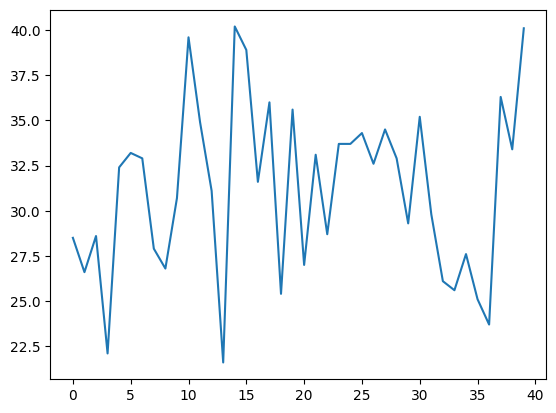

In [ ]:
plt.plot(df['standard'])

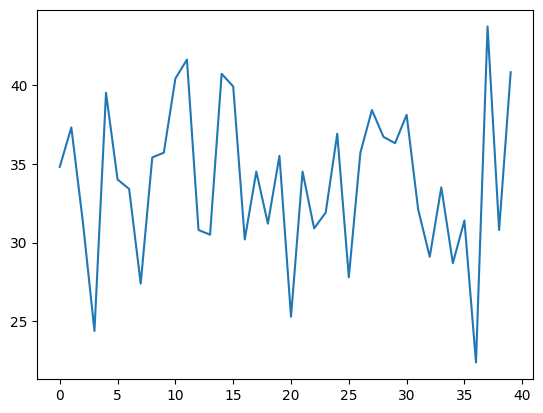

In [ ]:
plt.plot(df['new'])

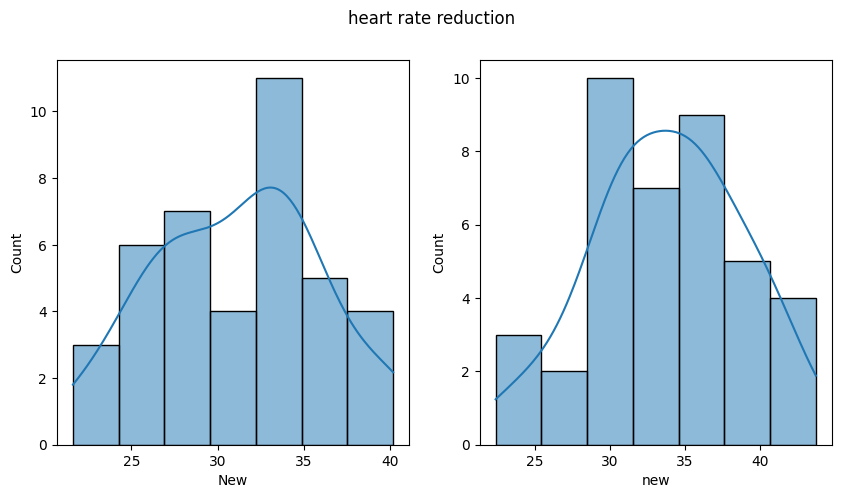

In [ ]:
std_data = df['standard']
new_data = df['new']
diff_data=['diff']

fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(std_data,ax=axes[0],kde=True)
axes[0].set_xlabel('Standard')
sns.histplot(new_data,ax=axes[1],kde=True)
axes[0].set_xlabel('New')
fig.suptitle('heart rate reduction')
plt.show()

<Axes: >

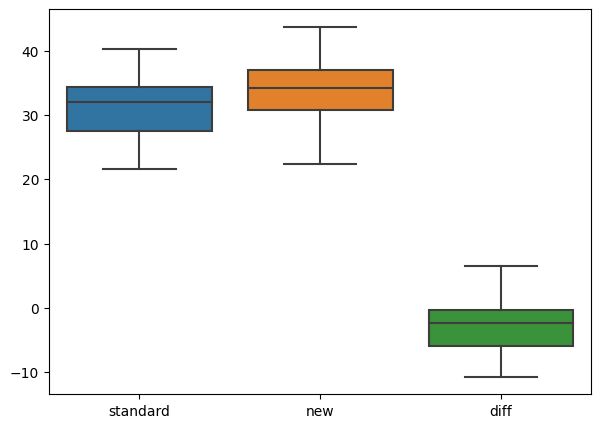

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.boxplot(data=df)


In [ ]:
cov_matrix = np.cov(std_data, new_data)
print(cov_matrix)

[[23.34660897 16.90785256]
 [16.90785256 24.38291667]]


In [ ]:
df = pd.DataFrame({'standard': std_data, 'new':new_data})

corr_matrix = df.corr()
print(corr_matrix)

          standard       new
standard  1.000000  0.708653
new       0.708653  1.000000


In [ ]:
from scipy.stats import ttest_ind

standard = df['standard']
new = df['new']


t_stat, p_val = stats.ttest_ind(standard,new)
print('t-statistics:',t_stat)
print('p_value:', p_val)

t-statistics: -2.430529866056425
p_value: 0.0173729973681508


In [ ]:
stats.ttest_rel(standard,new)

TtestResult(statistic=-4.501645821037794, pvalue=5.94804449767522e-05, df=39)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

df = pd.read_csv("/content/sample_data/HeartRateData.csv", encoding="ISO-8859-1")
diff = df['diff']

mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)

n = len(diff)
conf_level = 0.99

df = n - 1

t_val = t.ppf((1 + conf_level) / 2, df)

margin_of_error = t_val * std_diff / np.sqrt(n)

lower_bound = mean_diff - margin_of_error
upper_bound = mean_diff + margin_of_error

print("The two-sided {}% confidence interval is [{:.4f}, {:.4f}]".format(conf_level * 100, lower_bound, upper_bound))


The two-sided 99.0% confidence interval is [-4.2521, -1.0579]
